# Yandex.Afisha Report

we have data to the server logs a on Yandex.Afisha visits from June 2017 through May 2018.
the visits , orders and marketing expenses data we are goig to study :


* How people use the product
* When they start to buy
* How much money each customer brings
* When they pay off

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
#import ploty.express
#import ploty.graph_objects as go


# Preprocessing the data

we are going to study the three tables that we have 
* the missing values 
* errors

In [2]:
visits=pd.read_csv('/datasets/visits_log_us.csv')
orders=pd.read_csv('/datasets/orders_log_us.csv')
expenses=pd.read_csv('/datasets/costs_us.csv')

In [3]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


There are 50415 entries in the orders dataset, 3 columns. There are no missing values in the table.



In [6]:
expenses.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [7]:
expenses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


There are 2542 entries in the costs dataset, 3 columns. There are no missing values in the table.



In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


There are 359400 entries in the visits dataset, 5 columns. There are no missing values in the table.



# Make reports and calculate metrics:

# visits

How many people use it every day, week, and month?


In [9]:
visits['Start Ts']=pd.to_datetime(visits['Start Ts'])

visits['date']=visits['Start Ts'].dt.date
visits['week']=visits['Start Ts'].dt.week
visits['month']=visits['Start Ts'].dt.month
visits['year']=visits['Start Ts'].dt.year

visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,year
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017


done

Average number of daily active users:  907
Average number of daily active users:  5825
Average number of daily active users:  23228


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


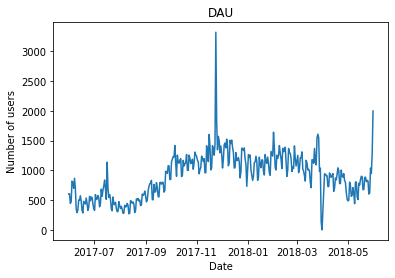

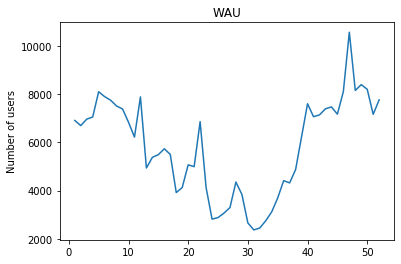

In [10]:
# plot for each maonth wau and dau plot 
dau = visits.groupby('date').agg({'Uid': 'nunique'})
wau = visits.groupby('week').agg({'Uid': 'nunique'})
mau = visits.groupby('month').agg({'Uid': 'nunique'})

print ("Average number of daily active users: ", int(dau.mean()))
print ("Average number of daily active users: ", int(wau.mean()))
print ("Average number of daily active users: ", int(mau.mean()))

plt.plot(dau)
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.title('DAU')
plt.show()
plt.plot(wau)
plt.ylabel('Number of users')
plt.title('WAU')
plt.show()


# DAU 

In [11]:
dau.max()


Uid    3319
dtype: int64

In [12]:
dau[dau['Uid']==3319]


,Uid
date,
2017-11-24,3319


In [13]:
dau.min()


Uid    1
dtype: int64

In [14]:
dau[dau['Uid']==1]


,Uid
date,
2018-03-31,1


- **DAU: We can see one spike and one sharp decline in the graph. the spike seems to be occored on 24 of november.**

maybe its Black Friday sales could be the reason for the spike it's the month before the Christmas and the new year and there will be a lot of sales 
about the decline it happend on 31 of march 2018





Text(0.5, 1.0, 'MAU')

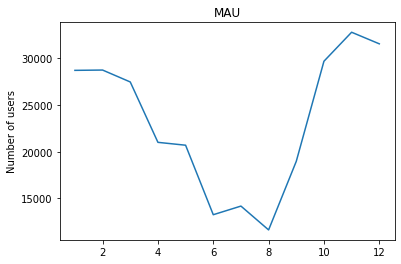

In [15]:
plt.plot(mau)
plt.ylabel('Number of users')
plt.title('MAU')

# MAU

We can see growth in MAU during September 2017 - November 2017 and slow decline during December 2018 - March 2018. We would say that November - March is a period of holidays , so more customers use the App.



In [16]:
#mau same with users_number _for each session
users_number_for_each_month=visits.pivot_table(index=['year','month'],values='Uid',aggfunc={'Uid':'nunique'}).reset_index()

In [17]:
users_number_for_each_month.head()

,year,month,Uid
0,2017,6,13259
1,2017,7,14183
2,2017,8,11631
3,2017,9,18975
4,2017,10,29692


In [18]:
# wau =users_number_for_each_week
users_number_for_each_week=visits.pivot_table(index=['year','week'],values='Uid',aggfunc={'Uid':'nunique'}).reset_index()

In [19]:
users_number_for_each_week.head()

,year,week,Uid
0,2017,22,2021
1,2017,23,4129
2,2017,24,2812
3,2017,25,2878
4,2017,26,3064


In [20]:
users_number_for_each_date=visits.pivot_table(index='date',values='Uid',aggfunc={'Uid':'nunique'}).reset_index()

In [21]:
users_number_for_each_date.head()

,date,Uid
0,2017-06-01,605
1,2017-06-02,608
2,2017-06-03,445
3,2017-06-04,476
4,2017-06-05,820


We can see growth in MAU during September 2017 - November 2017 and slow decline during December 2018 - March 2018. We would say that November - March is a period of holidays in Russia, so more customers use the App.



We can see growth in MAU during September 2017 - November 2017 and slow decline during December 2018 - March 2018. We would say that November - March is a period of holidays , so more customers use the App.
it is difficult to see how the users act in days and weeks but as we saw in the graph of DAU we have a positive spike(November) and negative spike(march) and thats because november is the month of holdays otherwise on march no sales month 

but to calculate how many monthly and weekly users use our app on daily use we are going to calculate sticky factor

In [22]:
#sticky factor = DAU/WAU and DAU/MAU

dau_wau = dau.mean()/wau.mean()*100
dau_mau = dau.mean()/mau.mean()*100
print(int(dau_wau),"% of weekly users use our app on daily basis.")
print(int(dau_mau),"% of monthly users use our app on daily basis.")

15 % of weekly users use our app on daily basis.
3 % of monthly users use our app on daily basis.


The sticky factor (how loyal clients are) is low.



How many sessions are there per day? (One user might have more than one session.)


In [23]:
session_per_day=visits.pivot_table(index='date',values='Uid',aggfunc={'Uid':'count'}).reset_index()

In [24]:
session_per_day.columns=['date','number_of_session_per_day']

In [25]:
session_per_day.head()

,date,number_of_session_per_day
0,2017-06-01,664
1,2017-06-02,658
2,2017-06-03,477
3,2017-06-04,510
4,2017-06-05,893


In [26]:
x=(session_per_day['number_of_session_per_day'].mean()).round(2)
print('the average number of usres per day',x)



the average number of usres per day 987.36


In [27]:
sessions_per_device = visits.groupby(['year', 'month', 'Device']).agg({'Uid':'count'})
sessions_per_device.unstack()['Uid']

Device      desktop  touch
year month                
2017 6        12358   4147
     7        12950   4878
     8        10854   3501
     9        17356   6551
     10       27392  10511
     11       32917  11052
     12       31112  10871
2018 1        26577  10362
     2        27077  10105
     3        25861   9818
     4        19231   7284
     5        18882   7753

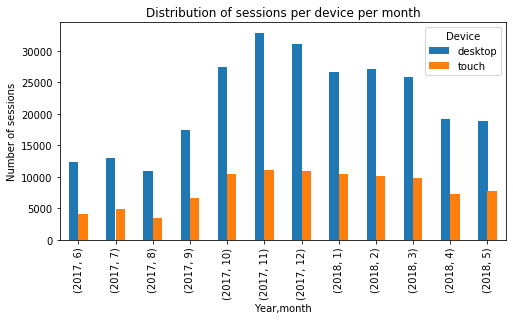

In [28]:
sessions_per_device.unstack()['Uid'].plot.bar(figsize=(8,4))

plt.xlabel('Year,month')
plt.ylabel('Number of sessions')
plt.title('Distribution of sessions per device per month')

plt.show()


We can see that the desktop is a leader. Maybe it's more comfortable to order tickets on "big screen".Also,on website there is more feauters then the phone people could control and feel safe more 



What is the length of each session?


In [29]:
visits['End Ts']=pd.to_datetime(visits['End Ts'])
visits['differ']=(visits['End Ts']-visits['Start Ts'])

In [30]:
visits.sample(10)



,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,year,differ
312300,desktop,2017-11-09 23:01:00,9,2017-11-09 22:59:00,4070197037280120060,2017-11-09,45,11,2017,00:02:00
245373,touch,2017-10-19 22:46:00,4,2017-10-19 22:45:00,2424316079809973876,2017-10-19,42,10,2017,00:01:00
335025,desktop,2018-02-12 16:04:00,3,2018-02-12 15:48:00,4615912537121154122,2018-02-12,7,2,2018,00:16:00
334994,desktop,2017-11-01 08:20:00,2,2017-11-01 08:19:00,9534697107484505257,2017-11-01,44,11,2017,00:01:00
337706,desktop,2018-05-12 17:33:00,1,2018-05-12 17:07:00,16996210257397172846,2018-05-12,19,5,2018,00:26:00
266418,touch,2017-11-05 23:51:00,4,2017-11-05 23:49:00,9129551131994705362,2017-11-05,44,11,2017,00:02:00
89797,desktop,2018-03-25 18:22:00,5,2018-03-25 18:16:00,7068212888046729974,2018-03-25,12,3,2018,00:06:00
99208,desktop,2017-11-18 15:52:00,5,2017-11-18 15:47:00,492896062908959417,2017-11-18,46,11,2017,00:05:00
71872,desktop,2017-12-28 20:50:00,1,2017-12-28 20:47:00,14757030577162747657,2017-12-28,52,12,2017,00:03:00
99764,desktop,2018-02-12 19:47:00,3,2018-02-12 19:27:00,7349948469057995381,2018-02-12,7,2,2018,00:20:00


In [31]:
visits['differ'].describe()

count                    359400
mean     0 days 00:10:43.025687
std      0 days 00:16:37.127760
min           -1 days +23:14:00
25%             0 days 00:02:00
50%             0 days 00:05:00
75%             0 days 00:14:00
max             0 days 11:51:00
Name: differ, dtype: object

we can notice that the difference is in minutes 

so i am going to apply the diiference column in minutes to make it readable in minutes_op/colse

In [32]:
visits['minutes_op/close']=((visits['End Ts']-visits['Start Ts']).dt.seconds)/60

In [33]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,year,differ,minutes_op/close
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,00:18:00,18.0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,00:28:00,28.0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,00:00:00,0.0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,00:24:00,24.0
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27,52,12,2017,00:00:00,0.0


In [34]:
first_visit=visits.groupby('Uid')['Start Ts'].min().reset_index()

In [35]:
first_visit.columns=['Uid','first_session_date']

In [36]:
visits=visits.merge(first_visit,on='Uid')

In [37]:
visits['first_session_dat']=pd.to_datetime(visits['first_session_date']).dt.date

In [38]:
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,date,week,month,year,differ,minutes_op/close,first_session_date,first_session_dat
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20,51,12,2017,00:18:00,18.0,2017-12-20 17:20:00,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19,8,2,2018,00:28:00,28.0,2018-02-19 16:53:00,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01,26,7,2017,00:00:00,0.0,2017-07-01 01:54:00,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20,20,5,2018,00:24:00,24.0,2018-03-09 20:05:00,2018-03-09
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03-09,10,3,2018,00:28:00,28.0,2018-03-09 20:05:00,2018-03-09


In [39]:
print("Average length of session in minutes: ",visits['minutes_op/close'].mean().round(1))

Average length of session in minutes:  10.7


Text(0, 0.5, 'Number of sessions')

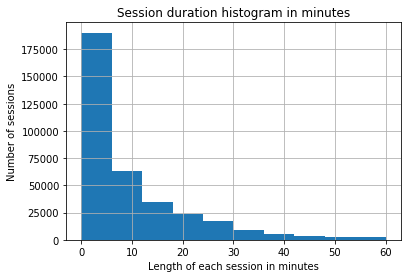

In [40]:
visits['minutes_op/close'].hist(range=(0,60))
plt.title('Session duration histogram in minutes')
plt.xlabel('Length of each session in minutes')
plt.ylabel('Number of sessions')

In our case in oder to find average session length (ASL) we need to use mode()


In [41]:
ASL = visits['minutes_op/close'].mode()
ASL

0    1.0
dtype: float64

So, our average session length one minute which is 60 seconds.



# cohort Analysis 

How often do users come back?


cohort analysis and retention 

calculate the fisrt session for each user 

retention for 0 lifetime is 1 because we are dividing 0 liftime on zero liftime  we want to see how the users are still active in the app come back to it not just registered and never come back 

we want to calculate the liftime in months years week 
and then the retention divide by the zero lifetime

calculate the age = liftetime the difference between the first session and any session tp see the age  how many active users still we have

how it pass after registration till the user made an action

0 age it means in the same month 

1 the second month 

we subtract date from the first date 12-12-2020 first date 
3-1-2020 less than a month when we divide the number by 30 which is the month it will gives us zero 
by that it's zero lifeteime

In [42]:
# lifetime datetime64[M] its for turning the date to the first of the month instead of 12-12-2020 ----> 1-12-2020
visits['beginofth_month_of_the_fisrt_session']=visits['first_session_dat'].astype('datetime64[M]')
visits['beginofth_month_of_the_fisrt_session'].unique()

array(['2017-12-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2018-03-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2018-01-01T00:00:00.000000000',
       '2017-10-01T00:00:00.000000000', '2018-05-01T00:00:00.000000000',
       '2018-04-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [43]:
#the subtraction gives us the days difference two three four --100 days we divide it by 
#np.timedelta(1,m) which does it mean by 30 .... 5 days /30 =0.0007 round . as int = 0 which is the lifetime
visits['lifetime']=(((pd.to_datetime(visits['date']))-(pd.to_datetime(visits['first_session_dat']))))/np.timedelta64(1,'M')
visits['lifetime']= visits['lifetime'].round().astype(int)

In [44]:
# creating DataFrame 'cohorts' 
cohorts = visits.groupby(['beginofth_month_of_the_fisrt_session','lifetime']).agg({'Uid':'nunique'}).reset_index()

# creating the initial_users_count DataFrame with the number of users in the 0th lifetime month
initial_users_count = cohorts[cohorts['lifetime'] == 0][['beginofth_month_of_the_fisrt_session','Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'}) 

# merge two DatFrames cohorts and initial_users_count
cohorts = cohorts.merge(initial_users_count,on='beginofth_month_of_the_fisrt_session')

In [45]:
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']


In [46]:
cohorts['beginofth_month_of_the_fisrt_session'] = cohorts['beginofth_month_of_the_fisrt_session'].dt.strftime('%Y-%m')


In [47]:
retention_pivot=cohorts.pivot_table(columns='lifetime',index='beginofth_month_of_the_fisrt_session',values='retention',aggfunc={'sum'})
retention_pivot_mean_age = retention_pivot.mean(axis = 0)
retention_pivot_mean_age.name = 'retention_mean_of_cohort_age'
retention_pivot_=retention_pivot.append(retention_pivot_mean_age)
retention_pivot_



sum                                \
lifetime                               0         1         2         3    
beginofth_month_of_the_fisrt_session                                      
2017-06                               1.0  0.073610  0.054152  0.060713   
2017-07                               1.0  0.056240  0.052359  0.053196   
2017-08                               1.0  0.068952  0.062175  0.058737   
2017-09                               1.0  0.075670  0.067289  0.048910   
2017-10                               1.0  0.073103  0.052970  0.037995   
2017-11                               1.0  0.068739  0.046829  0.038278   
2017-12                               1.0  0.050974  0.041080  0.028930   
2018-01                               1.0  0.053439  0.036289  0.025548   
2018-02                               1.0  0.047889  0.026850  0.018020   
2018-03                               1.0  0.041381  0.025062  0.003691   
2018-04                               1.0  0.039595  0.004329       NaN   
2018-05                               1.0  0.006548       NaN       NaN   
retention_mean_of_cohort_age          1.0  0.054678  0.042671  0.037402   

                                                                              \
lifetime                                    4         5         6         7    
beginofth_month_of_the_fisrt_session                                           
2017-06                               0.068633  0.067200  0.063655  0.056037   
2017-07                               0.056164  0.049315  0.044673  0.049696   
2017-08                               0.050781  0.042825  0.041057  0.034378   
2017-09                               0.039511  0.040230  0.033046  0.026102   
2017-10                               0.036109  0.031374  0.021096  0.017977   
2017-11                               0.031342  0.024222  0.018497  0.002752   
2017-12                               0.021569  0.016384  0.002770       NaN   
2018-01                               0.017150  0.001945       NaN       NaN   
2018-02                               0.002027       NaN       NaN       NaN   
2018-03                                    NaN       NaN       NaN       NaN   
2018-04                                    NaN       NaN       NaN       NaN   
2018-05                                    NaN       NaN       NaN       NaN   
retention_mean_of_cohort_age          0.035921  0.034187  0.032113  0.031157   

                                                                              \
lifetime                                    8         9         10        11   
beginofth_month_of_the_fisrt_session                                           
2017-06                               0.055660  0.050230  0.041255  0.040275   
2017-07                               0.036758  0.029604  0.023973  0.005479   
2017-08                               0.028976  0.023377  0.002848       NaN   
2017-09                               0.019816  0.002574       NaN       NaN   
2017-10                               0.003234       NaN       NaN       NaN   
2017-11                                    NaN       NaN       NaN       NaN   
2017-12                                    NaN       NaN       NaN       NaN   
2018-01                                    NaN       NaN       NaN       NaN   
2018-02                                    NaN       NaN       NaN       NaN   
2018-03                                    NaN       NaN       NaN       NaN   
2018-04                                    NaN       NaN       NaN       NaN   
2018-05                                    NaN       NaN       NaN       NaN   
retention_mean_of_cohort_age          0.028889  0.026446  0.022692  0.022877   

                                                
lifetime                                    12  
beginofth_month_of_the_fisrt_session            
2017-06                               0.012595  
2017-07                                    NaN  
2017-08                       

retention=cohorts.iloc[:,0:].div(cohorts['nunique',0],axis=0)

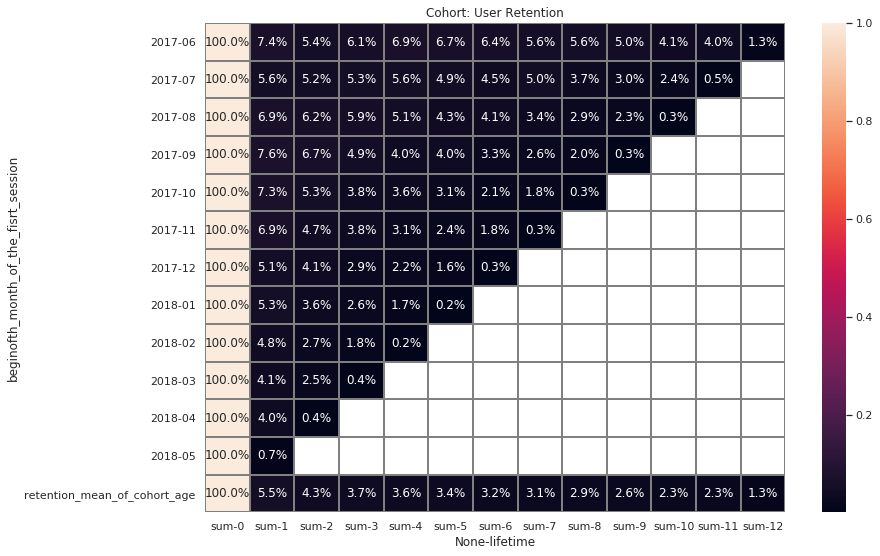

In [48]:
sns.set(style='white')
plt.figure(figsize=(13, 9))
plt.title('Cohort: User Retention')
sns.heatmap(
    retention_pivot_, annot=True, fmt='.1%', linewidths=1, linecolor='gray'
)

We saw that the highest retention rate in September cohort (maybe there were some special offers). After that retention rate decreasing from cohort to cohort. June cohort also looks good, we can see increasing of retention rate inside the cohort.

Conclusions:

Average number of daily active users: 907

Average number of weekly active users: 5716

Average number of monthly active users: 23228

We saw one sharp increasing in daily number of users (probably because of the Black Fraiday) and one sharp decline (probably because of the technical problems with App). We saw increasing in number of monthly active users during some periods of time September - November and slow decline during December - March. 

Average number of sessions per day: 987. Average session length is 60 seconds.


We saw that users prefer to use the app on the desktop than on the mobile.



We saw that the highest retention rate in September cohort (maybe there were some special offers). After that retention rate decreasing from cohort to cohort. June cohort also looks good, we can see increasing of retention rate inside the cohort.



# Sales

coversion going from step to another 
how long does it take from first visit to the purchase in days 

When do people start buying? (In KPI analysis, we're usually interested in knowing the time that elapses between registration and conversion — when the user becomes a customer. For example, if registration and the first purchase occur on the same day, the user might fall into category Conversion 0d. If the first purchase happens the next day, it will be Conversion 1d. You can use any approach that lets you compare the conversions of different cohorts, so that you can determine which cohort, or marketing channel, is most effective.)

In [49]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [50]:
first_purchase=orders.groupby('Buy Ts')['Uid'].min().reset_index()
first_purchase.columns=['first_purchase','Uid']
first_purchase.head()

,first_purchase,Uid
0,2017-06-01 00:10:00,10329302124590727494
1,2017-06-01 00:25:00,11627257723692907447
2,2017-06-01 00:27:00,17903680561304213844
3,2017-06-01 00:29:00,16109239769442553005
4,2017-06-01 07:58:00,14200605875248379450


In [51]:
first_visit_order=first_visit.merge(first_purchase,how='left',on=['Uid'])
first_visit_order.head()
first_visit_order['first_purchase'] =pd.to_datetime(first_visit_order['first_purchase'])

first_visit_order['first_session_date']=pd.to_datetime(first_visit_order['first_session_date'])

In [52]:
first_visit_order['diff_days'] = first_visit_order['first_purchase'] - first_visit_order['first_session_date']
first_visit_order['diff_days'] = first_visit_order['diff_days']/np.timedelta64(1,'D')

In [53]:
first_visit_order['diff_days'] = first_visit_order['diff_days'].fillna(-10)
first_visit_order['diff_days'] = first_visit_order['diff_days'].round().astype('int')


In [54]:
first_visit_order.head()


,Uid,first_session_date,first_purchase,diff_days
0,11863502262781,2018-03-01 17:27:00,NaT,-10
1,49537067089222,2018-02-06 15:55:00,NaT,-10
2,297729379853735,2017-06-07 18:47:00,NaT,-10
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,107
4,325320750514679,2017-09-30 14:29:00,NaT,-10


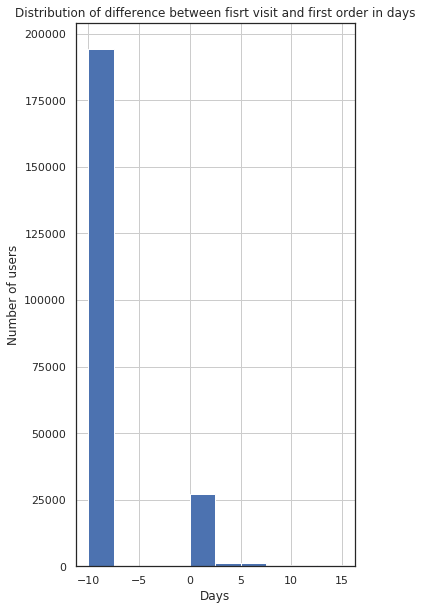

In [55]:

first_visit_order['diff_days'].hist(bins=10,range=(-10,15),figsize=(5,10))
plt.title('Distribution of difference between fisrt visit and first order in days')
plt.xlabel('Days')
plt.ylabel('Number of users')
plt.show()

We can see a large group of users that had only one visit and then left. Let's exclude this group and look at users that did make orders.



In [56]:
first_visit_order_ = first_visit_order[first_visit_order['diff_days']>=0].reset_index()


Let's look at distribution of difference between first visit and first order in minutes.



In [57]:
first_visit_order['differnece_minute'] = first_visit_order['first_purchase'] - first_visit_order['first_session_date']
first_visit_order['differnece_minute'] = first_visit_order['differnece_minute']/np.timedelta64(1,'m')
first_visit_order['differnece_minute'] = first_visit_order['differnece_minute'].fillna(-10)
first_visit_order['differnece_minute'] = first_visit_order['differnece_minute'].round().astype('int')
first_visit_order__ = first_visit_order[first_visit_order['differnece_minute']>=0].reset_index()

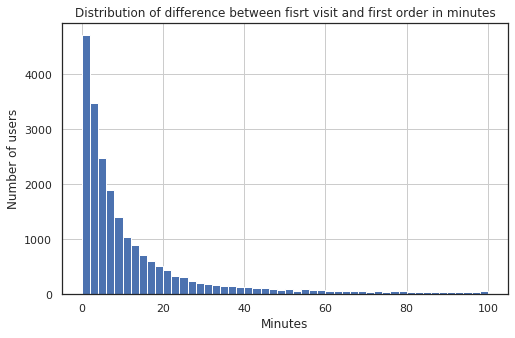

In [58]:
first_visit_order__['differnece_minute'].hist(bins = 50, range=(0,100), figsize=(8,5))
plt.title('Distribution of difference between fisrt visit and first order in minutes')
plt.xlabel('Minutes')
plt.ylabel('Number of users')
plt.show()

We can see that most users made their first purchase within 20 minutes on the same day of registration.




Let's create a column with such categories: "Converted 0d" ( if registration and the first purchase occur on the same day), "Converted 1-3d" (onverted within 1-3 day) and so on.

In [59]:

def conversion_category(x):
    if x==0:
        return "Converted 0d"
    elif x>=1 and x<=3:
        return "Converted 1-3d"
    elif x>=4 and x<=7:
        return "Converted 4-7d"
    elif x>=8 and x<=14:
        return "Converted 8-14d"
    elif x>14:
        return "Converted after 14d"
    else:
        return "Not converted"

In [60]:
first_visit_order['conversion_type']= first_visit_order['diff_days'].map(conversion_category)
first_visit_order.head()

,Uid,first_session_date,first_purchase,diff_days,differnece_minute,conversion_type
0,11863502262781,2018-03-01 17:27:00,NaT,-10,-10,Not converted
1,49537067089222,2018-02-06 15:55:00,NaT,-10,-10,Not converted
2,297729379853735,2017-06-07 18:47:00,NaT,-10,-10,Not converted
3,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,107,154022,Converted after 14d
4,325320750514679,2017-09-30 14:29:00,NaT,-10,-10,Not converted


In [61]:
#how many people made an purchase
x=orders['Uid'].nunique()
x

36523

In [62]:
#how many people had a first visit
y=visits['Uid'].nunique()
y

228169

In [63]:
print('overall conversion {:.2%}'.format(x/y))

overall conversion 16.01%


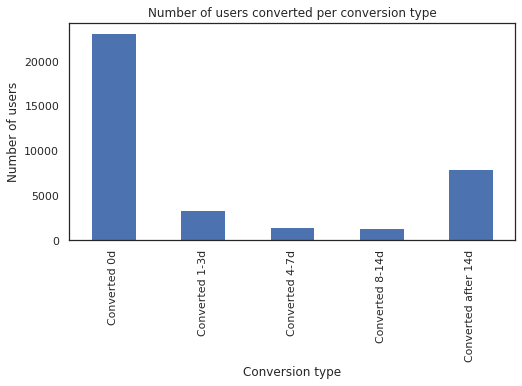

In [64]:

conv_type = first_visit_order[first_visit_order['diff_days']>=0].groupby('conversion_type')['Uid'].nunique()
conv_type.plot.bar(figsize =(8,4), legend=False)

plt.xlabel('Conversion type')
plt.ylabel('Number of users')
plt.title('Number of users converted per conversion type')

plt.show()

We see a high conversion of 0d (most users made purchases on the day of registration). This makes sense with online stores, usually people sign up with the intention to buy.



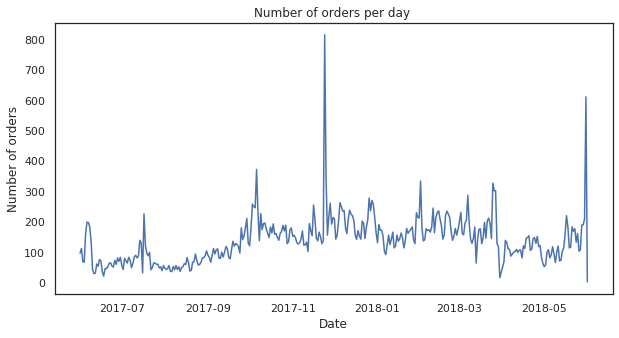

In [65]:

orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts']).dt.date
num_of_orders = orders.groupby('Buy Ts')['Uid'].count()

plt.figure(figsize=(10, 5))

plt.plot(num_of_orders)
plt.xlabel('Date')
plt.ylabel('Number of orders')
plt.title('Number of orders per day ')
plt.show()

We can see two spike at the end of November and at the end of May



Now let's find average number of orders per first visits month.



In [66]:
#merge orders and visits
orders_per_cohort = orders.merge(visits[['Uid','beginofth_month_of_the_fisrt_session']], on = 'Uid')

orders_per_cohort_= orders_per_cohort .groupby('beginofth_month_of_the_fisrt_session').agg({'Buy Ts': 'count', 'Uid':'nunique'})
orders_per_cohort_.columns = ['n_orders','n_users']
orders_per_cohort_['avg_num_of_orders'] = orders_per_cohort_['n_orders']/orders_per_cohort_['n_users']
orders_per_cohort_

,n_orders,n_users,avg_num_of_orders
beginofth_month_of_the_fisrt_session,,,
2017-06-01,447902,2923,153.233664
2017-07-01,23980,2458,9.755899
2017-08-01,50975,1721,29.619407
2017-09-01,32216,3058,10.534990
2017-10-01,26217,4678,5.604318
2017-11-01,58848,4262,13.807602
2017-12-01,29232,4074,7.175258
2018-01-01,24235,3119,7.770119
2018-02-01,19230,3186,6.035782


In [67]:
orders_per_cohort_= orders_per_cohort_['avg_num_of_orders'].reset_index()

orders_per_cohort_['beginofth_month_of_the_fisrt_session'] = orders_per_cohort_['beginofth_month_of_the_fisrt_session'].dt.strftime('%Y-%m')

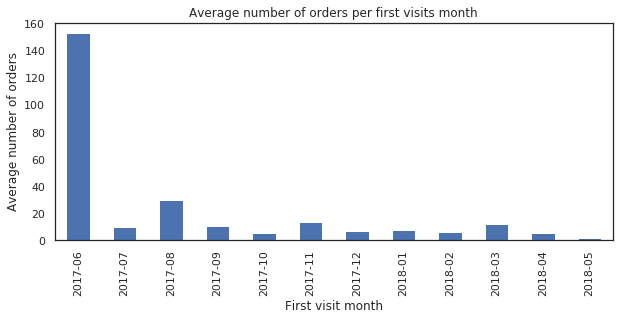

In [68]:

orders_per_cohort_.plot.bar(x='beginofth_month_of_the_fisrt_session', y = 'avg_num_of_orders', figsize =(10,4), legend=False)

plt.xlabel('First visit month')
plt.ylabel('Average number of orders')
plt.title('Average number of orders per first visits month')

plt.show()

We can see that June is a leader in average number of orders.



What is the average purchase size?

In [69]:
purch_size = orders_per_cohort.groupby('beginofth_month_of_the_fisrt_session').agg({'Revenue': 'sum', 'Uid': 'count'})
purch_size.columns = ['revenue_sum','n_orders']
purch_size['avg_purchase_size'] = purch_size['revenue_sum']/purch_size['n_orders']
purch_size

,revenue_sum,n_orders,avg_purchase_size
beginofth_month_of_the_fisrt_session,,,
2017-06-01,3.929833e+06,447902,8.773869
2017-07-01,1.686924e+05,23980,7.034711
2017-08-01,5.441894e+05,50975,10.675614
2017-09-01,1.229545e+06,32216,38.165662
2017-10-01,1.710361e+05,26217,6.523864
2017-11-01,2.471403e+05,58848,4.199639
2017-12-01,2.175067e+05,29232,7.440705
2018-01-01,1.341091e+05,24235,5.533696
2018-02-01,8.197011e+04,19230,4.262616


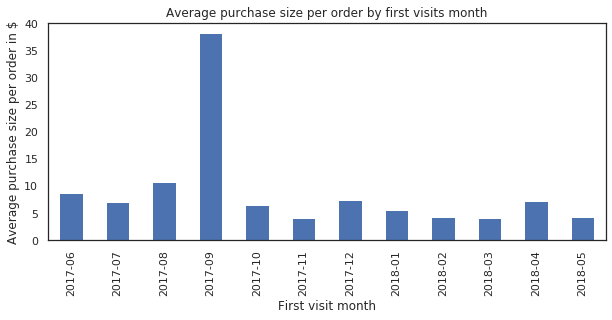

In [70]:
purch_size = purch_size['avg_purchase_size'].reset_index()

purch_size['beginofth_month_of_the_fisrt_session'] = purch_size['beginofth_month_of_the_fisrt_session'].dt.strftime('%Y-%m')

purch_size.plot.bar(x='beginofth_month_of_the_fisrt_session', y = 'avg_purchase_size', figsize =(10,4), legend=False)

plt.xlabel('First visit month')
plt.ylabel('Average purchase size per order in $')
plt.title('Average purchase size per order by first visits month')

plt.show()

The highest value of average purchase size is in September. Maybe because of the opening of theater season after summer holidays



How much money do they bring? (LTV)


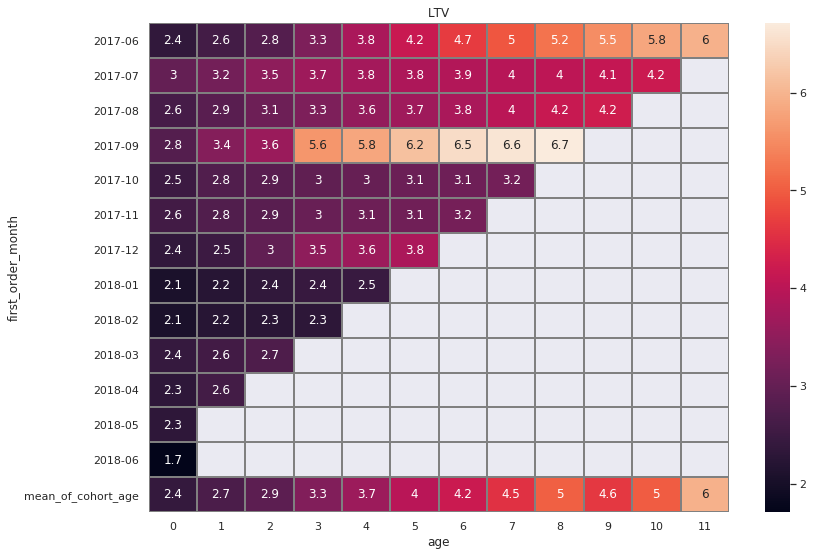

In [71]:
orders['order_month'] = orders['Buy Ts'].astype('datetime64[M]')
first_orders = orders.groupby('Uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['Uid', 'first_order_month']

cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']

orders_ltv = pd.merge(orders,first_orders, on='Uid')
cohorts_ltv = orders_ltv.groupby(['first_order_month','order_month']).agg({'Revenue': 'sum'}).reset_index()
report = pd.merge(cohort_sizes, cohorts_ltv, on='first_order_month')

margin_rate = .5
report['gp'] = report['Revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report['ltv'] = report['gp'] / report['n_buyers']

report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m') 

result = report.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='ltv', 
    aggfunc='mean').round(2)

result_ = result.fillna('')

result_sum = result.cumsum(axis=1).round(2)
result_sum_mean = result_sum.mean(axis = 0)
result_sum_mean.name = 'mean_of_cohort_age'
result_sum_ = result_sum.append(result_sum_mean)

sns.set()
plt.figure(figsize=(13, 9))
plt.title('LTV')

sns.heatmap(result_sum_ , annot=True,  linewidths=1, linecolor='gray')

plt.show()

Conclusions.

We can see that the most money we got from September and June cohorts.





Now we'll look at Average LTV per source.



In [72]:
orders_ltv_ = orders_ltv.merge(visits[['Uid', 'Source Id']].drop_duplicates(subset=['Uid']), on='Uid', how = 'left')
orders_ltv_ = orders_ltv_.groupby('Source Id').agg({'Revenue': 'sum', 'Uid': 'nunique'})
orders_ltv_.columns = ['revenue_sum','n_users']
orders_ltv_['ltv_av'] = orders_ltv_['revenue_sum']/orders_ltv_['n_users']
orders_ltv_.reset_index(inplace = True)
orders_ltv_

,Source Id,revenue_sum,n_users,ltv_av
0,1,38560.06,3743,10.301913
1,2,65152.26,4323,15.071076
2,3,44317.68,9138,4.849823
3,4,52479.75,9823,5.342538
4,5,40357.91,6839,5.901142
5,7,1.22,1,1.220000
6,9,7076.98,1415,5.001399
7,10,4111.34,1241,3.312925


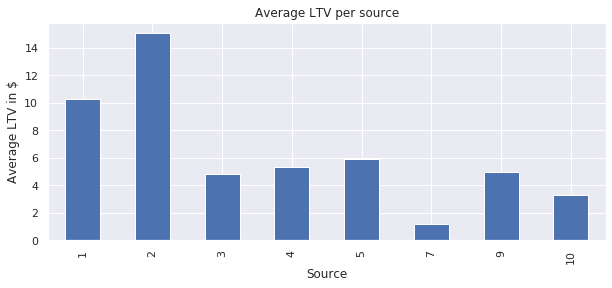

In [73]:
orders_ltv_.plot.bar(x='Source Id', y = 'ltv_av', figsize =(10,4), legend=False)

plt.xlabel('Source')
plt.ylabel('Average LTV in $')
plt.title('Average LTV per source')

plt.show()

Looks like source 2 and 1 bring the most profitable clients.

Conclusions.

We have seen that about 80% of all users have never made a purchase.

Most users made purchases on the day of registration. This makes sense with online stores, usually people sign up with the intention to buy.



The highest value of average purchase size was in September. Maybe because of the opening of theater season after summer holidays. However June was a leader in average number of orders. Both September and June cohorts brought us the most money.

# Marketing


How much money was spent? Overall/per source/over time


In [74]:
costs_per_cost=expenses.groupby('source_id')['costs'].sum().reset_index()
costs_per_cost.columns=['Source Id','costs']

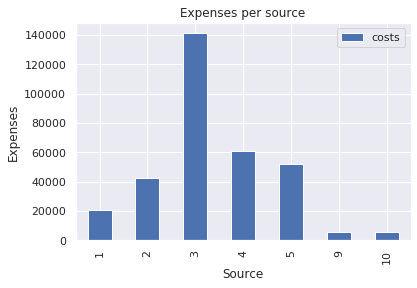

In [75]:
costs_per_cost.plot(x='Source Id',y='costs',kind='bar')
plt.xlabel('Source')
plt.ylabel('Expenses')
plt.title('Expenses per source')
plt.show()

In [76]:
expenses['costs'].sum()

329131.62

The source 3 is the most expensive.



How much did customer acquisition from each of the sources cost?


In [77]:

cac_per_source = costs_per_cost.merge(orders_ltv_[['Source Id', 'n_users']], on='Source Id', how = 'left')
cac_per_source

,Source Id,costs,n_users
0,1,20833.27,3743
1,2,42806.04,4323
2,3,141321.63,9138
3,4,61073.60,9823
4,5,51757.10,6839
5,9,5517.49,1415
6,10,5822.49,1241


In [78]:

cac_per_source['cac'] = cac_per_source['costs']/cac_per_source['n_users']
cac_per_source

,Source Id,costs,n_users,cac
0,1,20833.27,3743,5.565928
1,2,42806.04,4323,9.901929
2,3,141321.63,9138,15.465269
3,4,61073.60,9823,6.217408
4,5,51757.10,6839,7.567934
5,9,5517.49,1415,3.899286
6,10,5822.49,1241,4.691773


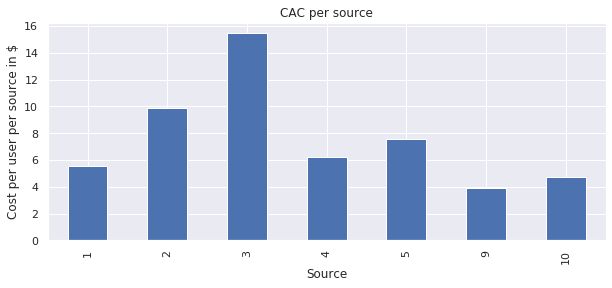

In [79]:

cac_per_source.plot.bar(x = 'Source Id', y = 'cac', figsize =(10,4), legend=False)

plt.xlabel('Source')
plt.ylabel('Cost per user per source in $')
plt.title('CAC per source')

plt.show()

Source 3 has the most value of CAC thus is the most expensive.





In [80]:
expenses['month']=expenses['dt'].astype('datetime64[M]') 
monthly_cost=expenses.groupby('month')['costs'].sum().reset_index()
monthly_cost.columns=['the_begin_of_the_month_first_purchase','costs_per_month']
monthly_cost

,the_begin_of_the_month_first_purchase,costs_per_month
0,2017-06-01,18015.00
1,2017-07-01,18240.59
2,2017-08-01,14790.54
3,2017-09-01,24368.91
4,2017-10-01,36322.88
5,2017-11-01,37907.88
6,2017-12-01,38315.35
7,2018-01-01,33518.52
8,2018-02-01,32723.03
9,2018-03-01,30415.27


In [81]:
report['first_order_month']=pd.to_datetime(report['first_order_month'])
monthly_cost['the_begin_of_the_month_first_purchase']=pd.to_datetime(monthly_cost['the_begin_of_the_month_first_purchase'])

How worthwhile where the investments? (ROI)

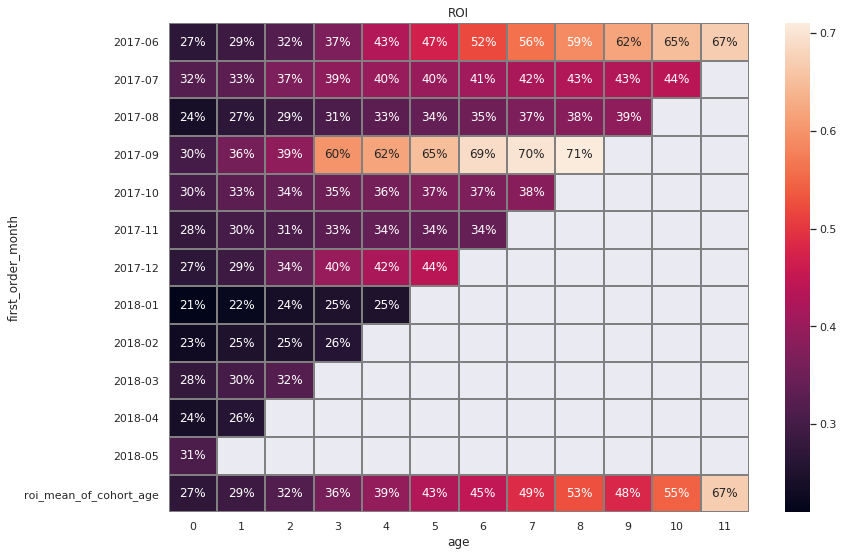

In [82]:
report_ = pd.merge(report, monthly_cost, left_on = 'first_order_month', right_on = 'the_begin_of_the_month_first_purchase')
report_['cac'] = report_['costs_per_month'] / report_['n_buyers']
report_['romi'] = report_['ltv'] / report_['cac']

report_['first_order_month'] = report_['first_order_month'].dt.strftime('%Y-%m') 

output = report_.pivot_table(
    index='first_order_month', 
    columns='age', 
    values='romi', 
    aggfunc='mean')

output_ = output.fillna('')

output_sum = output.cumsum(axis=1).round(2)
output_sum_mean = output_sum.mean(axis = 0)
output_sum_mean.name = 'roi_mean_of_cohort_age'
output_sum_ = output_sum.append(output_sum_mean)

sns.set()
plt.figure(figsize=(13, 9))
plt.title('ROI')

sns.heatmap(output_sum_ , annot=True,  fmt='.0%', linewidths=1, linecolor='gray')

plt.show()

There is no cohort that paid off.

Let's look at ROMI per source.

In [83]:
romi_merge = orders_ltv_[['Source Id','ltv_av']].merge(cac_per_source[['Source Id','cac']], on ='Source Id')
romi_merge['romi'] = romi_merge['ltv_av']/romi_merge['cac'] 
romi_merge

,Source Id,ltv_av,cac,romi
0,1,10.301913,5.565928,1.850889
1,2,15.071076,9.901929,1.522034
2,3,4.849823,15.465269,0.313594
3,4,5.342538,6.217408,0.859287
4,5,5.901142,7.567934,0.779756
5,9,5.001399,3.899286,1.282645
6,10,3.312925,4.691773,0.706114


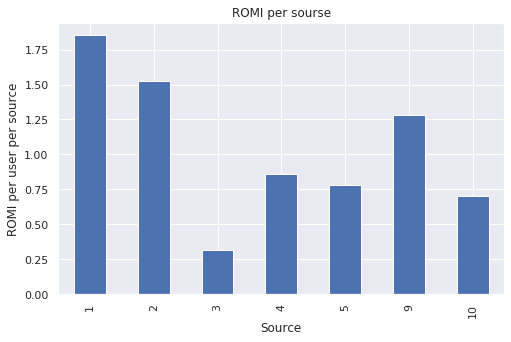

In [84]:
romi_merge.plot.bar(x = 'Source Id', y = 'romi', figsize =(8,5), legend=False)

plt.xlabel('Source')
plt.ylabel('ROMI per user per source')
plt.title('ROMI per sourse')

plt.show()

We can see that the highest value of ROMI brings us source 1.



# Conclusion


Average number of daily active users: 907

Average number of weekly active users: 5716

Average number of monthly active users: 23228

We saw one sharp increasing in daily number of users (probably because of the Black Fraiday) and one sharp decline . We saw increasing in number of monthly active users during some periods of time September - November and slow decline during December - March. We would say that November - March is a period of holidays , so more customers use the App.

Average number of sessions per day: 987. Average session length is 60 seconds(1 minute).

We saw that users prefer to use the app on the desktop than on the mobile.

The highest retention rate is in September cohort (maybe there were some special offers). After that retention rate is decreasing from cohort to cohort. June cohort also looks good, we can see increasing of retention rate inside the cohort.


The highest value of average purchase size was in September. Maybe because of the opening of theater season after summer holidays. However June was a leader in average number of orders. Both September and June cohorts brought us the most money.

We would recommend to choose source 1 since this source has the highest value of Return on Marketing Investment.. Sources 2 and 9 also looks good in terms of ROMI. We found out that sources 2 and 1 brought the most profitable clients. Source 3 is the most expensive and not profitable. 